In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Preprocess image and load

In [25]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [32]:
content_image = load_image('shahrukh.jpg')
style_image = load_image('monet.jpeg')

# Visualize the output

In [33]:
content_image.shape

TensorShape([1, 269, 187, 3])

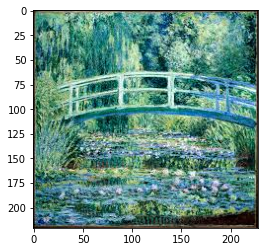

In [34]:
plt.imshow(np.squeeze(style_image))
plt.show()

# Stylize Image

In [35]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

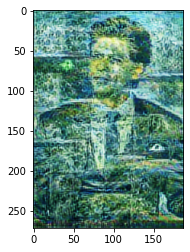

In [36]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [37]:

cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))  # your image get stored to your folder named as generated_img.jpg

True